# Clase 2

## Objetivos:

* Utilizar Jupyter Notebooks
* Introducción a metodos númericos con `numpy`
* Graficar resultados (matplotlib)

1. Resolución de sistemas de ecuaciones lineales: numpy
--------------------------------------------------------

El siguiente sistema de equaciones lineales

\begin{equation}
10a + 2b = 20 \\ 
3a + 7b = 19
\end{equation}

Se puede escribir como 

\begin{equation}
\left[ \begin{array}{ccc} 10 & 2 \\ 3 & 7 \\ \end{array} \right]\left[ \begin{array}{c} a \\ b \\ \end{array} \right] = \left[ \begin{array}{c} 20 \\ 19 \\ \end{array} \right]
\end{equation}

O de manera más compacta:

\begin{equation} 
AX = B
\end{equation}

En donde:

\begin{align}
A & = \left[ \begin{array}{ccc} 10 & 2 \\ 3 & 7 \\ \end{array} \right] \\
X &= \left[ \begin{array}{c} a \\ b \\ \end{array} \right] \\
B &= \left[ \begin{array}{c} 20 \\ 19 \\ \end{array} \right] \\
\end{align}

Usando algebra lineal podemos encontrar $X$:

\begin{align}
AX &= B \\
A^{-1} AX &= A^{-1}B \\
X &= A^{-1}B
\end{align}

Para resolver este sistema en Python utilizaremos la libreria [numpy](http://www.numpy.org/)

In [3]:
# Carga la libreria numpy y la renombra np (simplemente para ser más conciso)
import numpy as np 

# Definiendo matrices
A = np.matrix([[10,2], [3,7]])
B = np.matrix([[20], [19]])

# Calculando la inversa de A

A_inverse = np.linalg.inv(A)

# Resolviendo para X
X = A_inverse * B # esta es la libreria de al
print( X )


[[1.59375]
 [2.03125]]


Ejercicios
-----------

Resuelve los siguientes sistemas de ecuaciones, definiendo una función que tome como input $A$ y $B$, y entregue como resultado $X$.

1. Sistema de 3x3

    \begin{align}
    10a + 2b + 3c &= 20 \\ 
    3a + 7b + 5c &= 19 \\
    3a + 7b + 7c &= 15
    \end{align}

2. Sistema de 4x4

    \begin{align}
    10a + 2b + 3c + 3d &= 20 \\ 
    3a + 7b + 5c + 1d &= 19 \\
    3a + 7b + 7c + 10d &= 15 \\
    4a + 9b + 8c + 9d &= 18 
    \end{align}


In [4]:
A1=np.matrix([[10,2,3],[3,7,5],[3,7,7]])
B1=np.matrix([[20],[19],[15]])

A2=np.matrix([[10,2,3,3],[3,7,5,1],[3,7,7,10],[4,9,8,9]])
B2=np.matrix([[20],[19],[15],[18]])

def solLinAlg(A,B):
    # Carga la libreria numpy y la renombra np (simplemente para ser más conciso)
    import numpy as np 
    A_inverse = np.linalg.inv(A)
    # Resolviendo para X
    X = A_inverse * B # esta es la libreria de al
    return X

print("Sol1:" )
print(solLinAlg(A1,B1) )
print("Sol2:" )
print(solLinAlg(A2,B2) )

Sol1:
[[ 1.9375]
 [ 3.3125]
 [-2.    ]]
Sol2:
[[ -0.45054945]
 [-11.05494505]
 [ 20.54945055]
 [ -5.01098901]]


2. Estadistica: distribución normal
-----------------------------------

En teoría de la probabilidad, la [distribución normal](https://en.wikipedia.org/wiki/Normal_distribution) 
es una de las más usadas. Matemáticamente corresponde a:

\begin{equation}
f(x | \mu,\sigma^2)={{1}\over{ \sqrt{ 2\pi \sigma^2 } } } e^{- {{(x-\mu)^2} \over {2 \sigma^2}} }
\end{equation}

En Python, la libreria numpy tiene una implementación de esta distribución. Veamos un ejempplo.

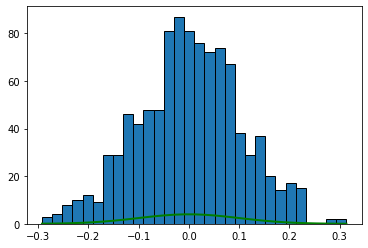

In [7]:
mu, sigma = 0, 0.1 # promedio y desviación estandar
s = np.random.normal(mu, sigma, 1000) # 1000 puntos generados aleatoriamente

# Grafico de los puntos muestreados (samples)
import matplotlib.pyplot as plt

n, x, blabla = plt.hist(s, bins=30, edgecolor='black') # Crea un histograma
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='green') # Crea una linea calculada usando la ecuacion de la distribución normal
plt.show() # Muestra el grafico en pantalla

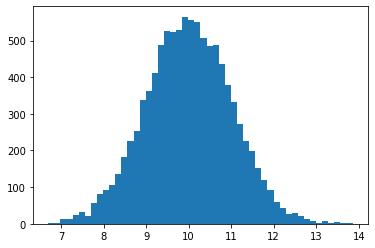

In [8]:
np.random.seed(100)

mu, sigma = 10, 1 # promedio y desviación estandar
s = np.random.normal(mu, sigma, 10000) # 1000 puntos generados aleatoriamente
len(s)
# Grafico de los puntos muestreados (samples)
import matplotlib.pyplot as plt
plt.hist(s,bins=50)
plt.show()

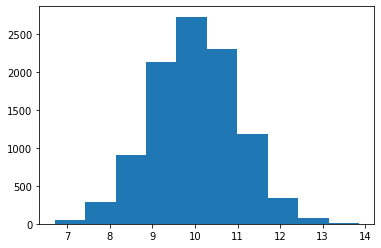

In [9]:
plt.hist(s)
plt.show()

La generación de datos aleatorios (usando la distribución normal u otras) es especialmente útil cuando se necesita simular datos experimentales. Esto se hará evidente en la próxima sección.

Ejercicios
-----------

Simula y gráfica tres distribuciones normales, cada una con los siguientes parámetros:

1. $\mu=10$, $\sigma=0.7$
2. $\mu=-10$, $\sigma=0.7$
3. $\mu=10$, $\sigma=2.7$

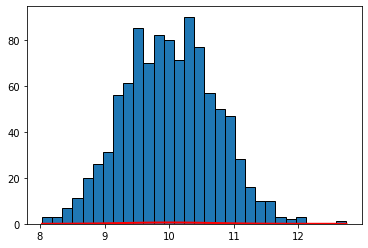

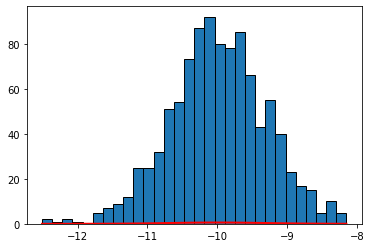

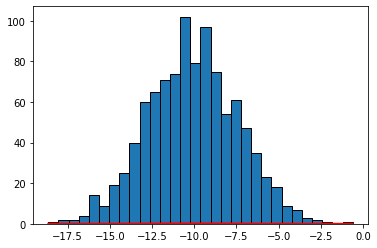

0

In [12]:
def graficarNormal(u,s,n):
    datos = np.random.normal(u, s, n) # n puntos generados aleatoriamente

    # Grafico de los puntos muestreados (samples)
    import matplotlib.pyplot as plt

    n, bins, blabla = plt.hist(datos, 30,edgecolor='black') # Crea un histograma
    plt.plot(bins, 1/(s * np.sqrt(2 * np.pi)) *np.exp( - (bins - u)**2 / (2 * s**2) ),
             linewidth=2, color='r') # Crea una linea calculada usando la ecuacion de la distribución normal
    plt.show() # Muestra el grafico en pantalla
    return 0

graficarNormal(10,0.7,1000)
graficarNormal(-10,0.7,1000)
graficarNormal(-10,2.7,1000)

## 3. Ajuste por minimización de los minimos cuadrados

Dado un conjunto de datos experimentales $\{t,y\} \in R^n$ y una función $f(t|\alpha)$ el objetivo es encontrar el valor de $\alpha$ que minimize la suma de los errores (también llamados residuales):

\begin{equation}
 S=\sum_i^n r_i^2 \\
 r_i = y_i-f(t_i|\alpha)
\end{equation}

Ejemplo:

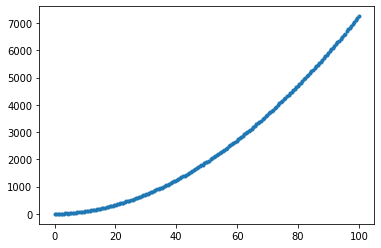

In [13]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Generar datos {t,y}, en donde y=t^2
t = np.linspace(0,100,200)
parabola = t**1.93 
noise = np.random.normal(0,5,200)
y = parabola + noise
plt.plot(t,y,'.')
plt.show()


Para encontrar el valor de $\alpha$ usaremos la funcion leastsq de scipy

(array([1.92997855]), 3)


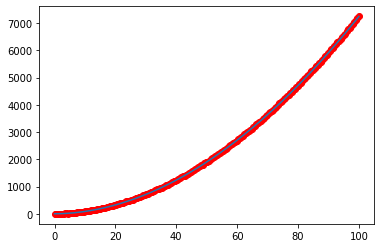

In [15]:
from scipy.optimize import leastsq
def residual(alpha,x,y):
    f = np.power(x,alpha) # x**alpha
    return y-f

out=leastsq(residual,2,args=(t,y))
print(out)
out[0][0]
fit=np.power(t,out[0][0])
plt.plot(t,y,'ro')
plt.plot(t,fit)
plt.show()

Ejercicios
----------

1. Crear una sequencia $\{t,y\} \in R^{200}$ en donde: $y=sin(t)\alpha$, y $\alpha=4.3$.
2. Agregar ruido normal ($\mu=0, \sigma=0.2$) a $y$, para obtener $y'$.
3. Dados $\{t,y'\}$ crear una función para encontrar el valor de $\alpha$.
4. Graficar los resultados, incluyendo la curva ajustada.
5. Repetir lo anterior, pero esta vez con $y=mt+b$, en donde $m=2$ y $b=0.5$.


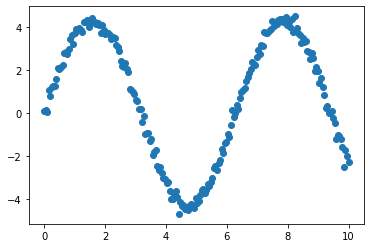

(array([4.30526166]), 3)


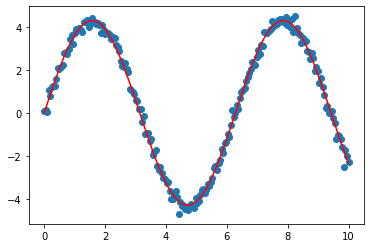

4.305261659573865


In [18]:
t = np.linspace(0,10,200)
a=4.3
y=np.sin(t)*a
noise=np.random.normal(0,0.2,200)
y_prima=y+noise
plt.plot(t,y_prima,'o')
plt.show()

def encontrarA(t,y,vi):
    from scipy.optimize import leastsq
    def residual(a,t,y):
        model = np.sin(t)*a
        return y-model

    out=leastsq(residual,vi,args=(t,y))
    print(out)
    a=out[0][0]
    fit=np.sin(t)*a
    plt.plot(t,y_prima,'o')
    plt.plot(t,fit,'r')
    plt.show()
    return a
a=encontrarA(t,y_prima,2)
print(a)